In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


# Analisis exploratorio de datos


In [3]:
#Cargando los datos
data_credit_cards= pd.read_csv('Credits_Cards_Dataset.csv')
data_credit_cards.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


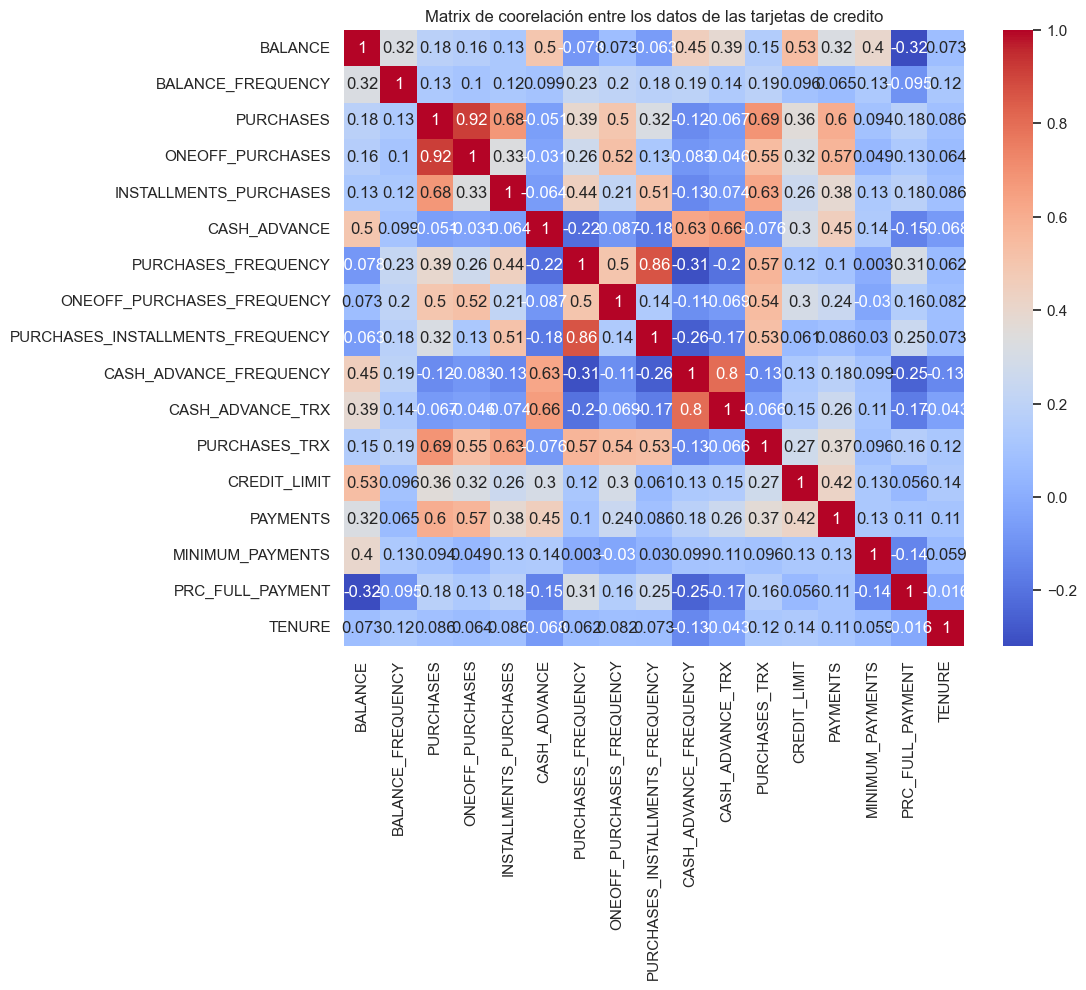

In [4]:
#veamos la correlación

#Primero filtremos solo las variables númericas
numeric_columns = data_credit_cards.select_dtypes(include=np.number).columns

#Matriz de correlación 
correlation_matrix = data_credit_cards[numeric_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

plt.title('Matrix de coorelación entre los datos de las tarjetas de credito')
plt.show()



In [5]:
#Veamos solamente las relaciones que esten solamente por encima de 0.5 (En valor absoluto)

# Crear una lista para almacenar las duplas de variables correlacionadas
correlated_variables = []

# Recorrer la matriz de correlación
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        # Obtener el valor de correlación
        correlation_value = correlation_matrix.iloc[i, j]
        
        # Verificar si la correlación es mayor a 0.5 o menor a -0.5
        if correlation_value > 0.5 or correlation_value < -0.5:
            # Agregar las variables y el valor de correlación a la lista
            correlated_variables.append([correlation_matrix.columns[i], correlation_matrix.columns[j], correlation_value])

# Crear un DataFrame a partir de la lista de variables correlacionadas
df_correlated = pd.DataFrame(correlated_variables, columns=['Variable 1', 'Variable 2', 'Correlation'])

# Ordenar el DataFrame en orden descendente según el valor de correlación
df_correlated = df_correlated.sort_values(by='Correlation', ascending=False)

# Mostrar el DataFrame de variables correlacionadas
df_correlated


,Variable 1,Variable 2,Correlation
1,PURCHASES,ONEOFF_PURCHASES,0.916845
13,PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,0.862934
17,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,0.799561
3,PURCHASES,PURCHASES_TRX,0.689561
2,PURCHASES,INSTALLMENTS_PURCHASES,0.679896
11,CASH_ADVANCE,CASH_ADVANCE_TRX,0.656498
10,CASH_ADVANCE,CASH_ADVANCE_FREQUENCY,0.628522
9,INSTALLMENTS_PURCHASES,PURCHASES_TRX,0.628108
4,PURCHASES,PAYMENTS,0.603264
14,PURCHASES_FREQUENCY,PURCHASES_TRX,0.568430


## Algunas posible observaciones interesantes entre la correlación de los datos:


La variable 'PURCHASES' muestra una correlación alta con 'ONEOFF_PURCHASES' (0.917), 'INSTALLMENTS_PURCHASES' (0.680), 'PURCHASES_TRX' (0.690) y 'PAYMENTS' (0.603). Esto sugiere que los clientes que realizan compras más grandes (ONEOFF_PURCHASES) tienden a realizar más compras en general (PURCHASES) y en cuotas (INSTALLMENTS_PURCHASES). También hay una relación positiva con los pagos realizados (PAYMENTS), lo que indica que los clientes que realizan más compras también tienden a realizar pagos más grandes.

La variable 'CASH_ADVANCE' muestra una correlación significativa con 'CASH_ADVANCE_FREQUENCY' (0.629) y 'CASH_ADVANCE_TRX' (0.656). Esto sugiere que los clientes que hacen más avances de efectivo (CASH_ADVANCE) también tienden a hacerlo con más frecuencia (CASH_ADVANCE_FREQUENCY) y en una mayor cantidad de transacciones (CASH_ADVANCE_TRX).

La variable 'PURCHASES_FREQUENCY' muestra una correlación alta con 'PURCHASES_INSTALLMENTS_FREQUENCY' (0.863). Esto indica que los clientes que realizan compras con frecuencia también tienden a realizar compras a plazos con frecuencia. También hay correlaciones moderadas con 'ONEOFF_PURCHASES_FREQUENCY' (0.501) y 'PURCHASES_TRX' (0.568), lo que indica relaciones adicionales entre la frecuencia de compras.

Estas correlaciones sugieren patrones interesantes en el comportamiento de los clientes de tarjetas de crédito. 

In [6]:
data_credit_cards.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


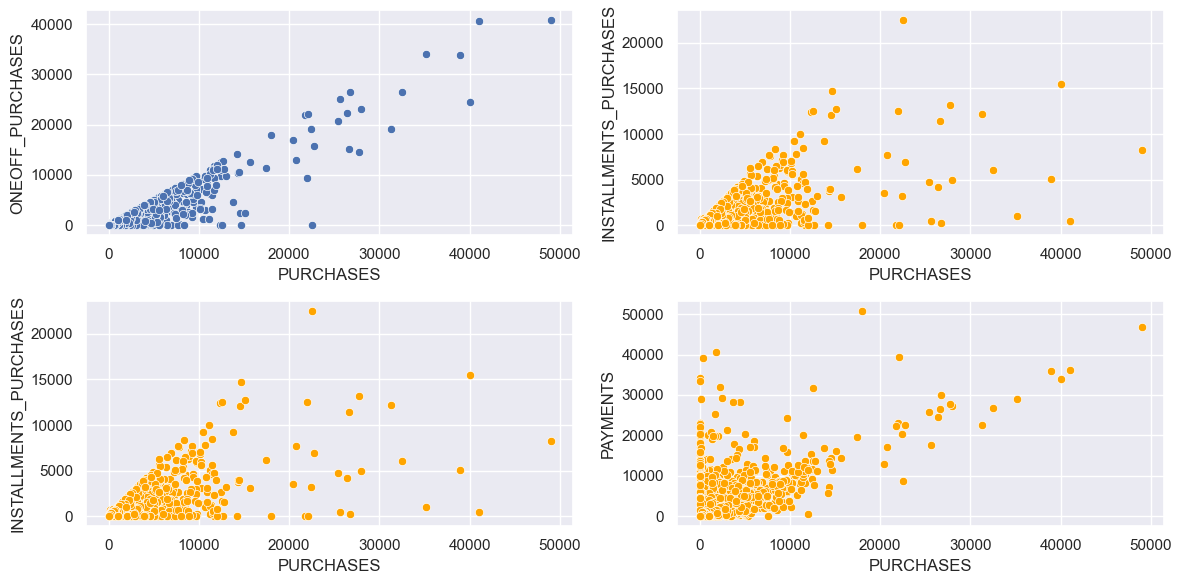

In [16]:
#Veamos estas correlaciones en gráficos

# Configurar subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 6))

# Primer gráfico: puchase vs oneoff:purchases
sns.scatterplot(data=data_credit_cards,x='PURCHASES',y='ONEOFF_PURCHASES',ax=axes[0,0])


# Segundo gráfico: Purchase vs INSTALLMENTS_PURCHASES
sns.scatterplot(data=data_credit_cards,x='PURCHASES',y='INSTALLMENTS_PURCHASES',ax=axes[0,1],color='orange')


sns.scatterplot(data=data_credit_cards,x='PURCHASES',y='INSTALLMENTS_PURCHASES',ax=axes[1,0],color='orange')

sns.scatterplot(data=data_credit_cards,x='PURCHASES',y='PAYMENTS',ax=axes[1,1],color='orange')

# Ajustar espacio entre subplots
plt.tight_layout()

plt.show()
